In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lorentz_def(x,y0,xc,q,A,noise):
    y = y0/2-(2*A/np.pi)*(xc*q/(4*q**2*(x-xc)**2+xc**2))
    y = y + np.random.normal(y, noise)
    return y

def fano(x,y0,xc,A,u,q,noise):
    y = y0/2+A*((u+(2*q/xc)*(xc-x))**2/(1+((2*q/xc)*(xc-x))**2))
    y = y + np.random.normal(y, noise)
    return y 

(2000,)


' kind = np.array([1,0])\nfano_test = np.append(fano_test, kind)\nprint(fano_test.shape)  '

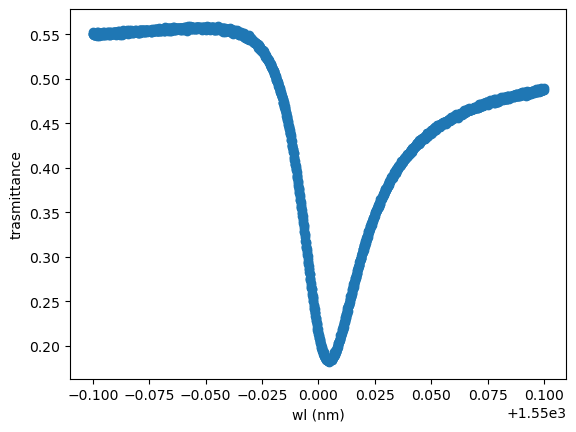

In [46]:
wl=np.arange(1549.9,1550.1,0.0001)
fano_test = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=+0.3, xc=1550, q=5e4, A=np.random.uniform(0.05, 0.3), noise=0.001)
lorentz_test = lorentz_def(x=wl, y0=np.random.uniform(0.9, 0.95), xc=1550, q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.001,0.0015), noise=0.001)

#np.random.uniform(0.05, 0.3)

plt.scatter(wl, fano_test)
#plt.scatter(wl, lorentz_test)
plt.xlabel('wl (nm)')
plt.ylabel('trasmittance')

print(wl.shape)
""" kind = np.array([1,0])
fano_test = np.append(fano_test, kind)
print(fano_test.shape)  """

In [9]:
for i in range(5):
    print(i)

0
1
2
3
4


In [48]:
wl=np.arange(1549.9,1550.1,0.0001)
data_res = np.zeros((3000,2001))
lorentz_label = 1
fano_label = 0

for i in range(1000):
    lorentz = lorentz_def(x=wl, y0=np.random.uniform(0.8, 0.95), xc=1550, q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.001,0.0015), noise=0.001)
    lorentz = np.append(lorentz, lorentz_label)
    data_res[i,:] = lorentz

for i in range(500):
    fano_asimm_sx = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=np.random.uniform(0.05, 0.3), xc=1550, q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.05, 0.3), noise=0.001)
    fano_asimm_sx = np.append(fano_asimm_sx, fano_label)
    data_res[i+1000,:] = fano_asimm_sx 

for i in range(500):
    fano_asimm_dx = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=-np.random.uniform(0.05, 0.3), xc=1550, q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.05, 0.3), noise=0.001)
    fano_asimm_dx = np.append(fano_asimm_dx, fano_label)
    data_res[i+1500,:] = fano_asimm_dx 

for i in range(1000):
    fano_simm = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=1e-5, xc=1550, q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.05, 0.3), noise=0.001)
    fano_simm = np.append(fano_simm, fano_label)
    data_res[i+2000,:] = fano_simm 

#print(data_test[1000])

In [51]:
import h5py

with h5py.File(r'C:\Users\marce\Uni\Dottorato\Machine learning\ML_exam\resonances_dataset.h5', 'w') as f:
    f.create_dataset('resonances', data=data_res)
